In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage as linkage
from scipy.cluster.hierarchy import dendrogram as dendrogram
from sklearn.decomposition import PCA
import sklearn.metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv').copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id', axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
X = df.drop('Species', axis = 1)

<Axes: >

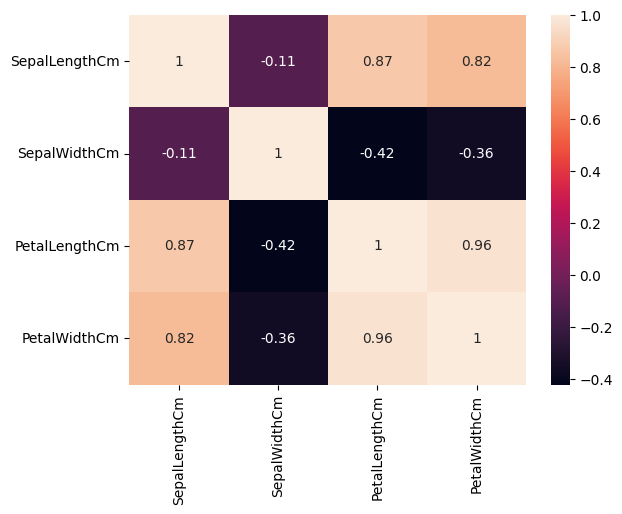

In [6]:
sns.heatmap(X.corr(), annot = True)

c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


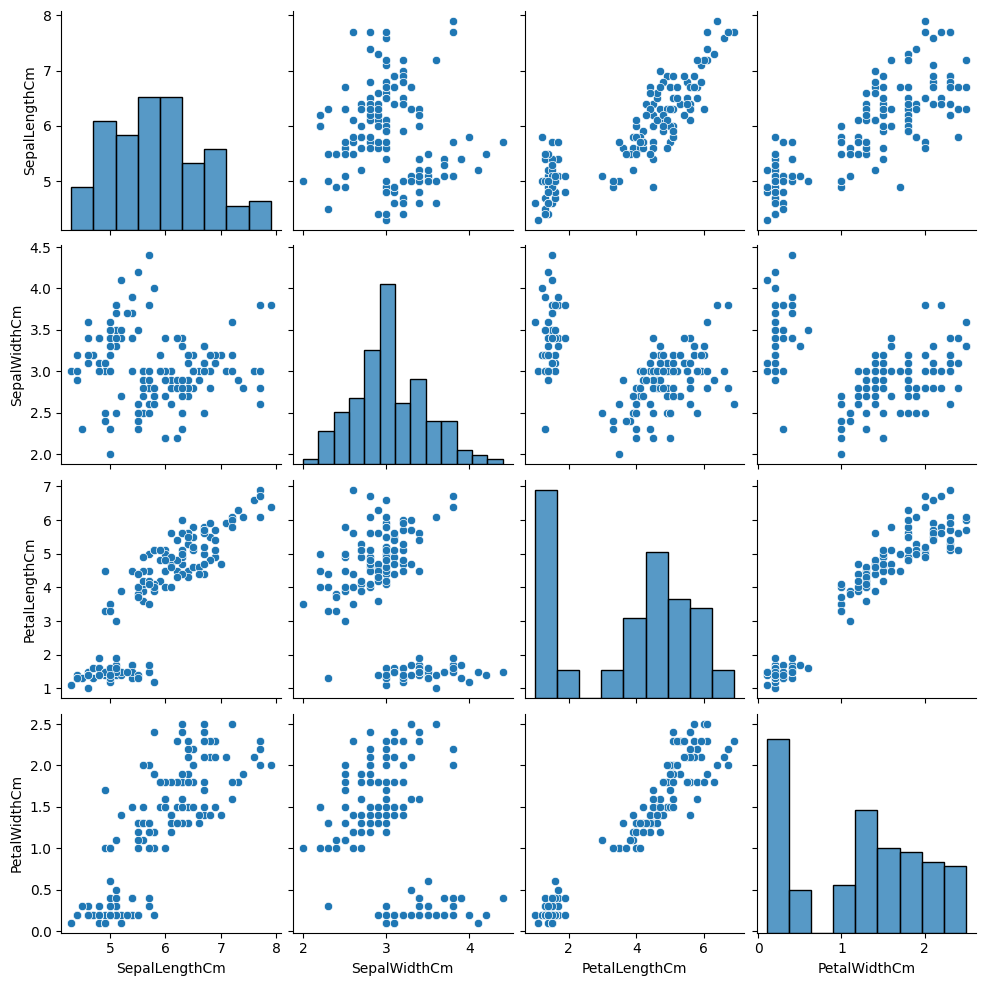

In [7]:
sns.pairplot(X)

In [8]:
sc = StandardScaler()
X = sc.fit_transform(X)

Using Elbow Method

In [9]:
wcss = []

for k in range(1, 10):
    k_means = KMeans(n_clusters = k, init = 'k-means++', random_state = 101)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

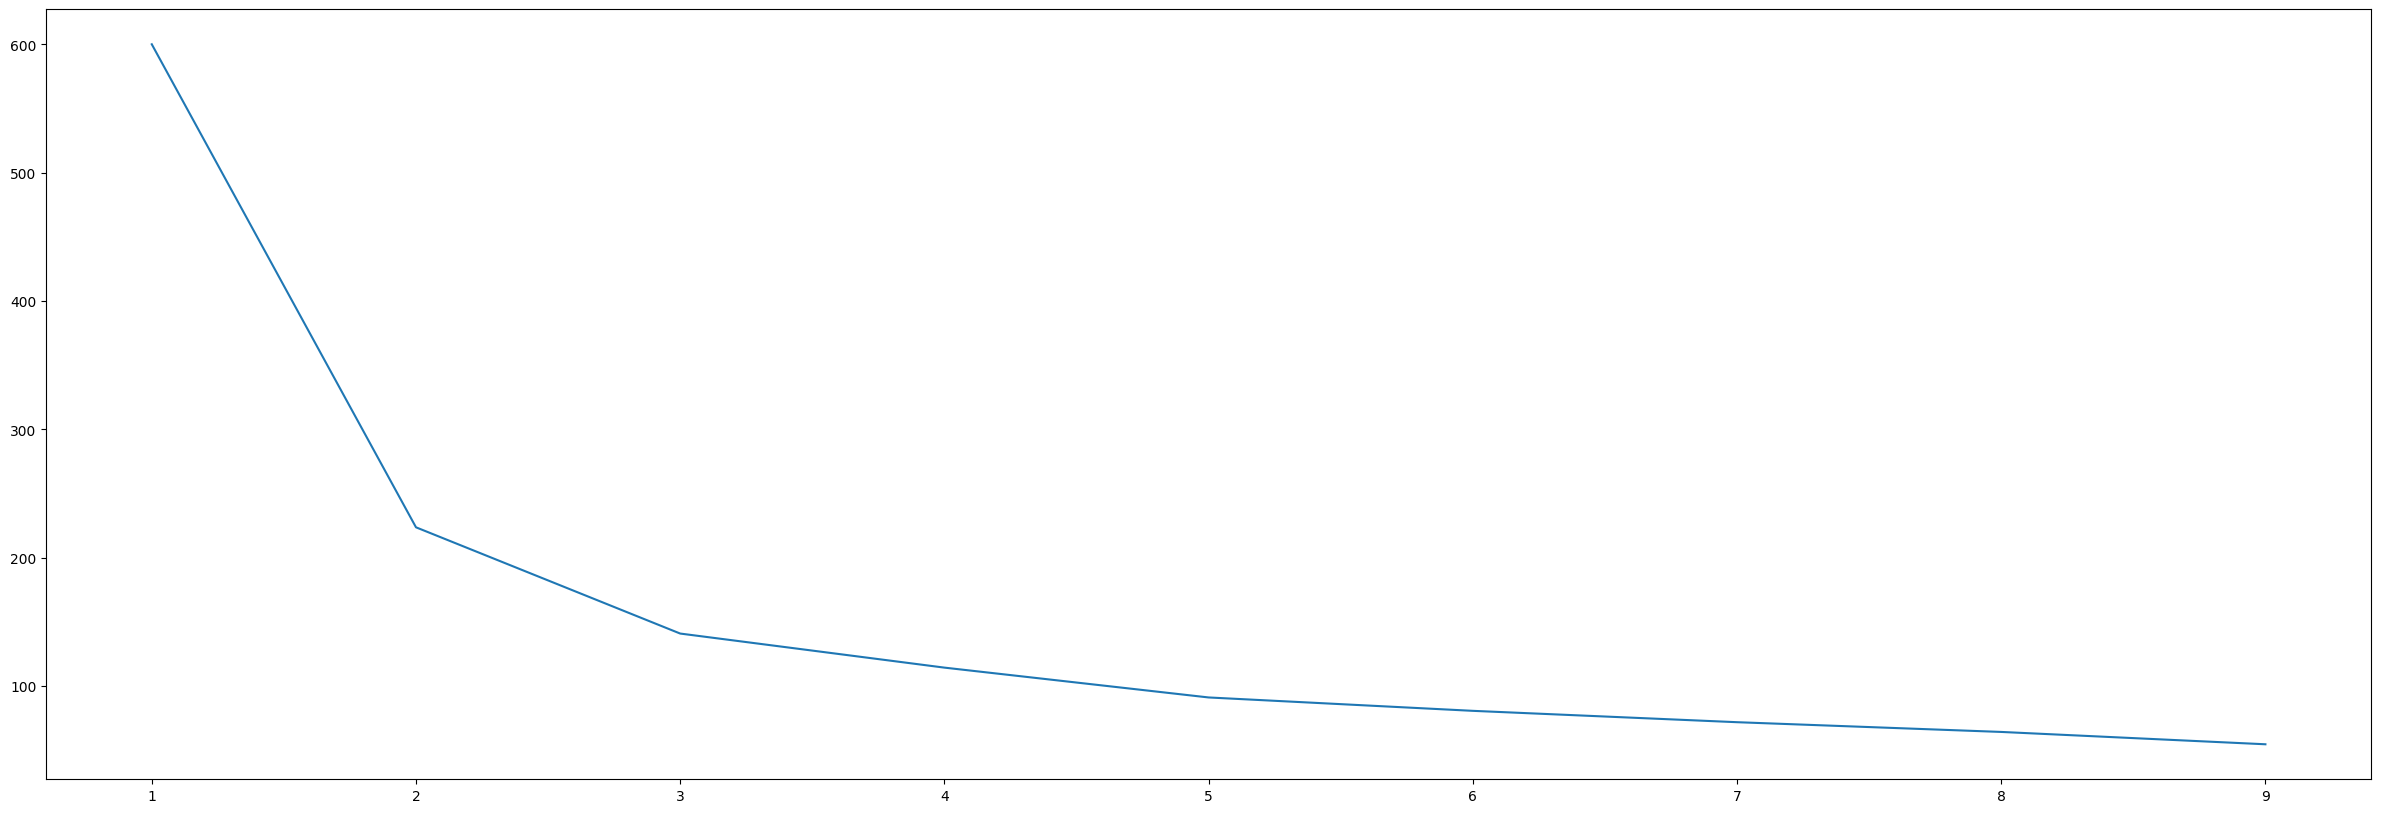

In [10]:
plt.figure(figsize = (30, 10))
plt.plot(range(1, 10), wcss)

K = 3

In [11]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 101)
k_means_fit = k_means.fit(X)
k_means_predict = k_means_fit.predict(X)
k_means_predict

c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

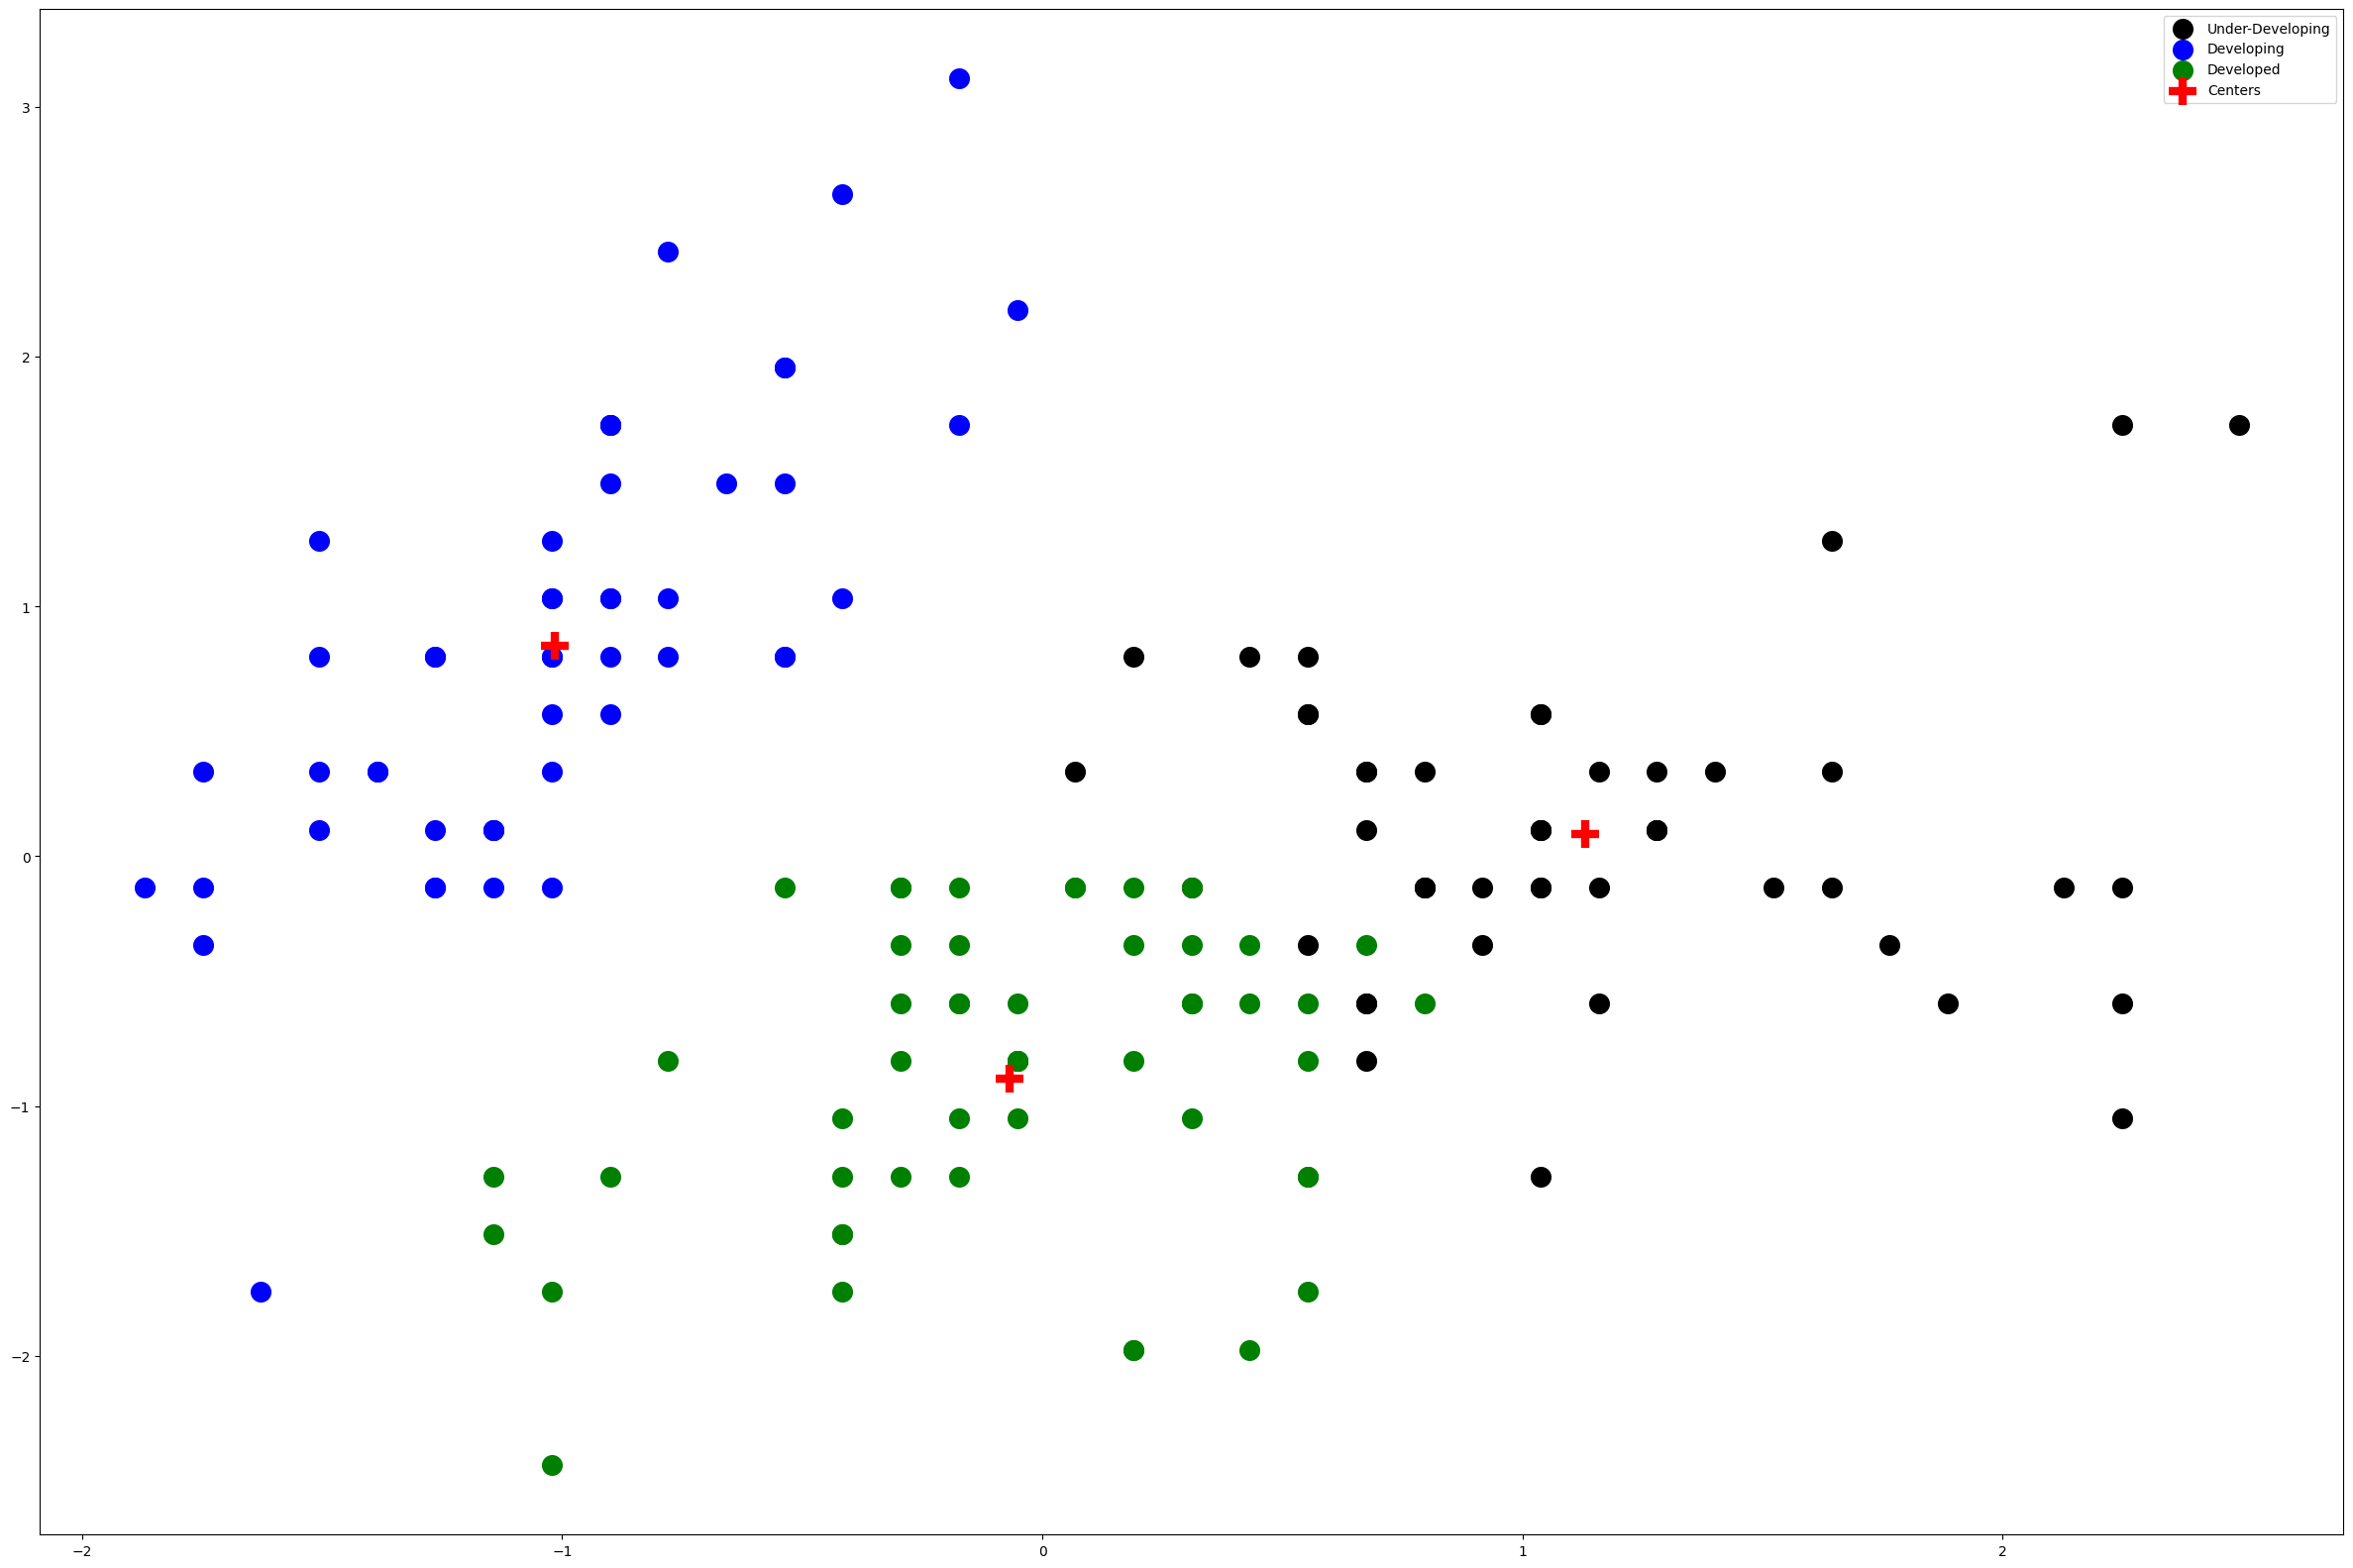

In [12]:
plt.figure(figsize = (30, 20))
plt.scatter(X[k_means_predict == 0, 0], X[k_means_predict == 0, 1], c = 'black', s = 200, label = 'Under-Developing')
plt.scatter(X[k_means_predict == 1, 0], X[k_means_predict == 1, 1], c = 'blue', s = 200, label = 'Developing')
plt.scatter(X[k_means_predict == 2, 0], X[k_means_predict == 2, 1], c = 'green', s = 200, label = 'Developed')
plt.scatter(k_means_fit.cluster_centers_[:, 0], k_means_fit.cluster_centers_[:, 1], marker = '+', c = 'red', s =400, label = 'Centers', linewidths = 6)
plt.legend()
plt.show()

In [13]:
df['KMeans Clustering'] = k_means_predict

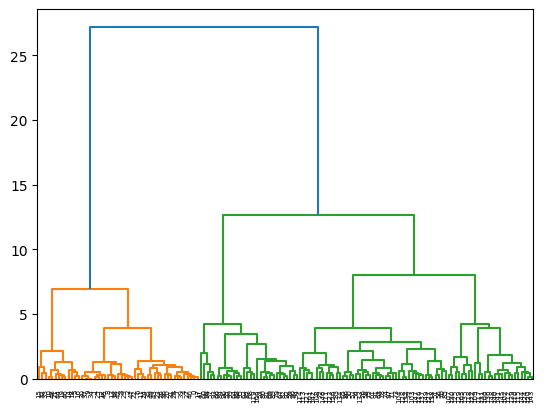

In [14]:
merg = linkage(X, method = 'ward')
dendrogram(merg)
plt.show()

As it can be seen from the Dendogram, K = 3

In [15]:
hierarchy = AgglomerativeClustering(n_clusters = 3)
hierarchy_predict = hierarchy.fit_predict(X)

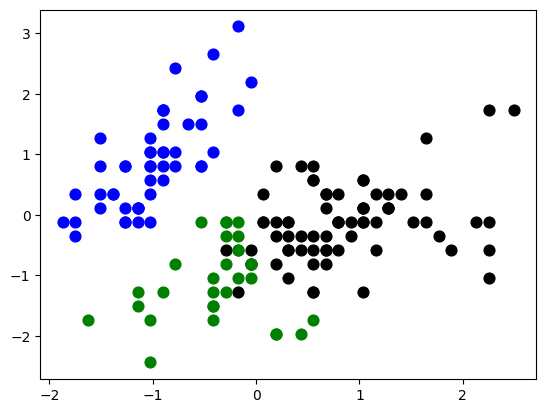

In [16]:
plt.scatter(X[hierarchy_predict == 0, 0], X[hierarchy_predict == 0, 1], c = 'black', s = 60, label = 'Under-Developing')
plt.scatter(X[hierarchy_predict == 1, 0], X[hierarchy_predict == 1, 1], c = 'blue', s = 60, label = 'Developing')
plt.scatter(X[hierarchy_predict == 2, 0], X[hierarchy_predict == 2, 1], c = 'green', s = 60, label = 'Developed')
plt.show()

In [17]:
df['Hierarchical Clustering'] = hierarchy_predict

In [18]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans Clustering,Hierarchical Clustering
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0
